# Arbeitsblatt 1: Explorative Analyse und Hauptkomponentenanalyse

## 1. Explorative Analyse des Datensatzes ''Boston Housing''

*Boston Housing* ist ein berühmter Datensatz zur Evaluierung von Regressionsalgorithmen. Er enthält 506 Einträge mit jeweils 13 Variablen. Ziel ist es, den Hauspreis (`tgt`) aus den anderen Variablen vorherzusagen. Der Download dieses Datensatzes in einen Pandas-DataFrame wird folgendermaßen durchgeführt:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

Wichtig für diese Übung ist eine grundlegende Vertrautheit mit den Python-Paketen Numpy und Pandas. Die Abgabe der Aufgabe erfolgt als fertiges IPython-Notebook mit Kommentaren in Markdown.

Aufgaben:

a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch. 

b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: Welche der Variablen sind kategorisch? Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)

c) Die Dokumentation der eingesetzten Systemkonfiguration und Paketversionen erfolgt durch das Skript `version_information` von R. H. Johanson. Installation über

Im Notebook-Header muss das Paket importiert werden über

In [1]:
%load_ext version_information

Danach kann die Information über die Systemkonfiguration dargestellt werden durch

In [2]:
%version_information

Software versions
Python 3.9.13 64bit [Clang 12.0.0 ]
IPython 8.5.0
OS macOS 10.16 x86_64 i386 64bit
Mon Oct 17 10:29:28 2022 CEST

Sollen zusätzlich Versionsinformationen über die eingesetzten Pakete dargestellt werden, verwendet man (hier z.B. Numpy und Pandas)

In [3]:
%version_information numpy, pandas

Software versions
Python 3.9.13 64bit [Clang 12.0.0 ]
IPython 8.5.0
OS macOS 10.16 x86_64 i386 64bit
numpy 1.23.3
pandas 1.5.0
Mon Oct 17 10:29:32 2022 CEST

Diese Zeilen sollten immer am Ende des Notebooks aufgerufen werden, um ein Mindestmaß an Reproduzierbarkeit sicherzustellen.

# Aufgabe 1

### a) Explorative Analyse

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
boston.shape

(506, 14)

In [24]:
boston.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [25]:
boston.duplicated().any()

False

#### -> Kein Duplikat, NaN / 506 Datensätze mi 14 Features

In [27]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot: xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot: xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot: xlabel='B', ylabel='CRIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TGT', ylabel='CRIM'>],
       [<AxesSubplot: xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot: xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot: xlabel='NOX', ylabel='ZN'>,
        <Axe

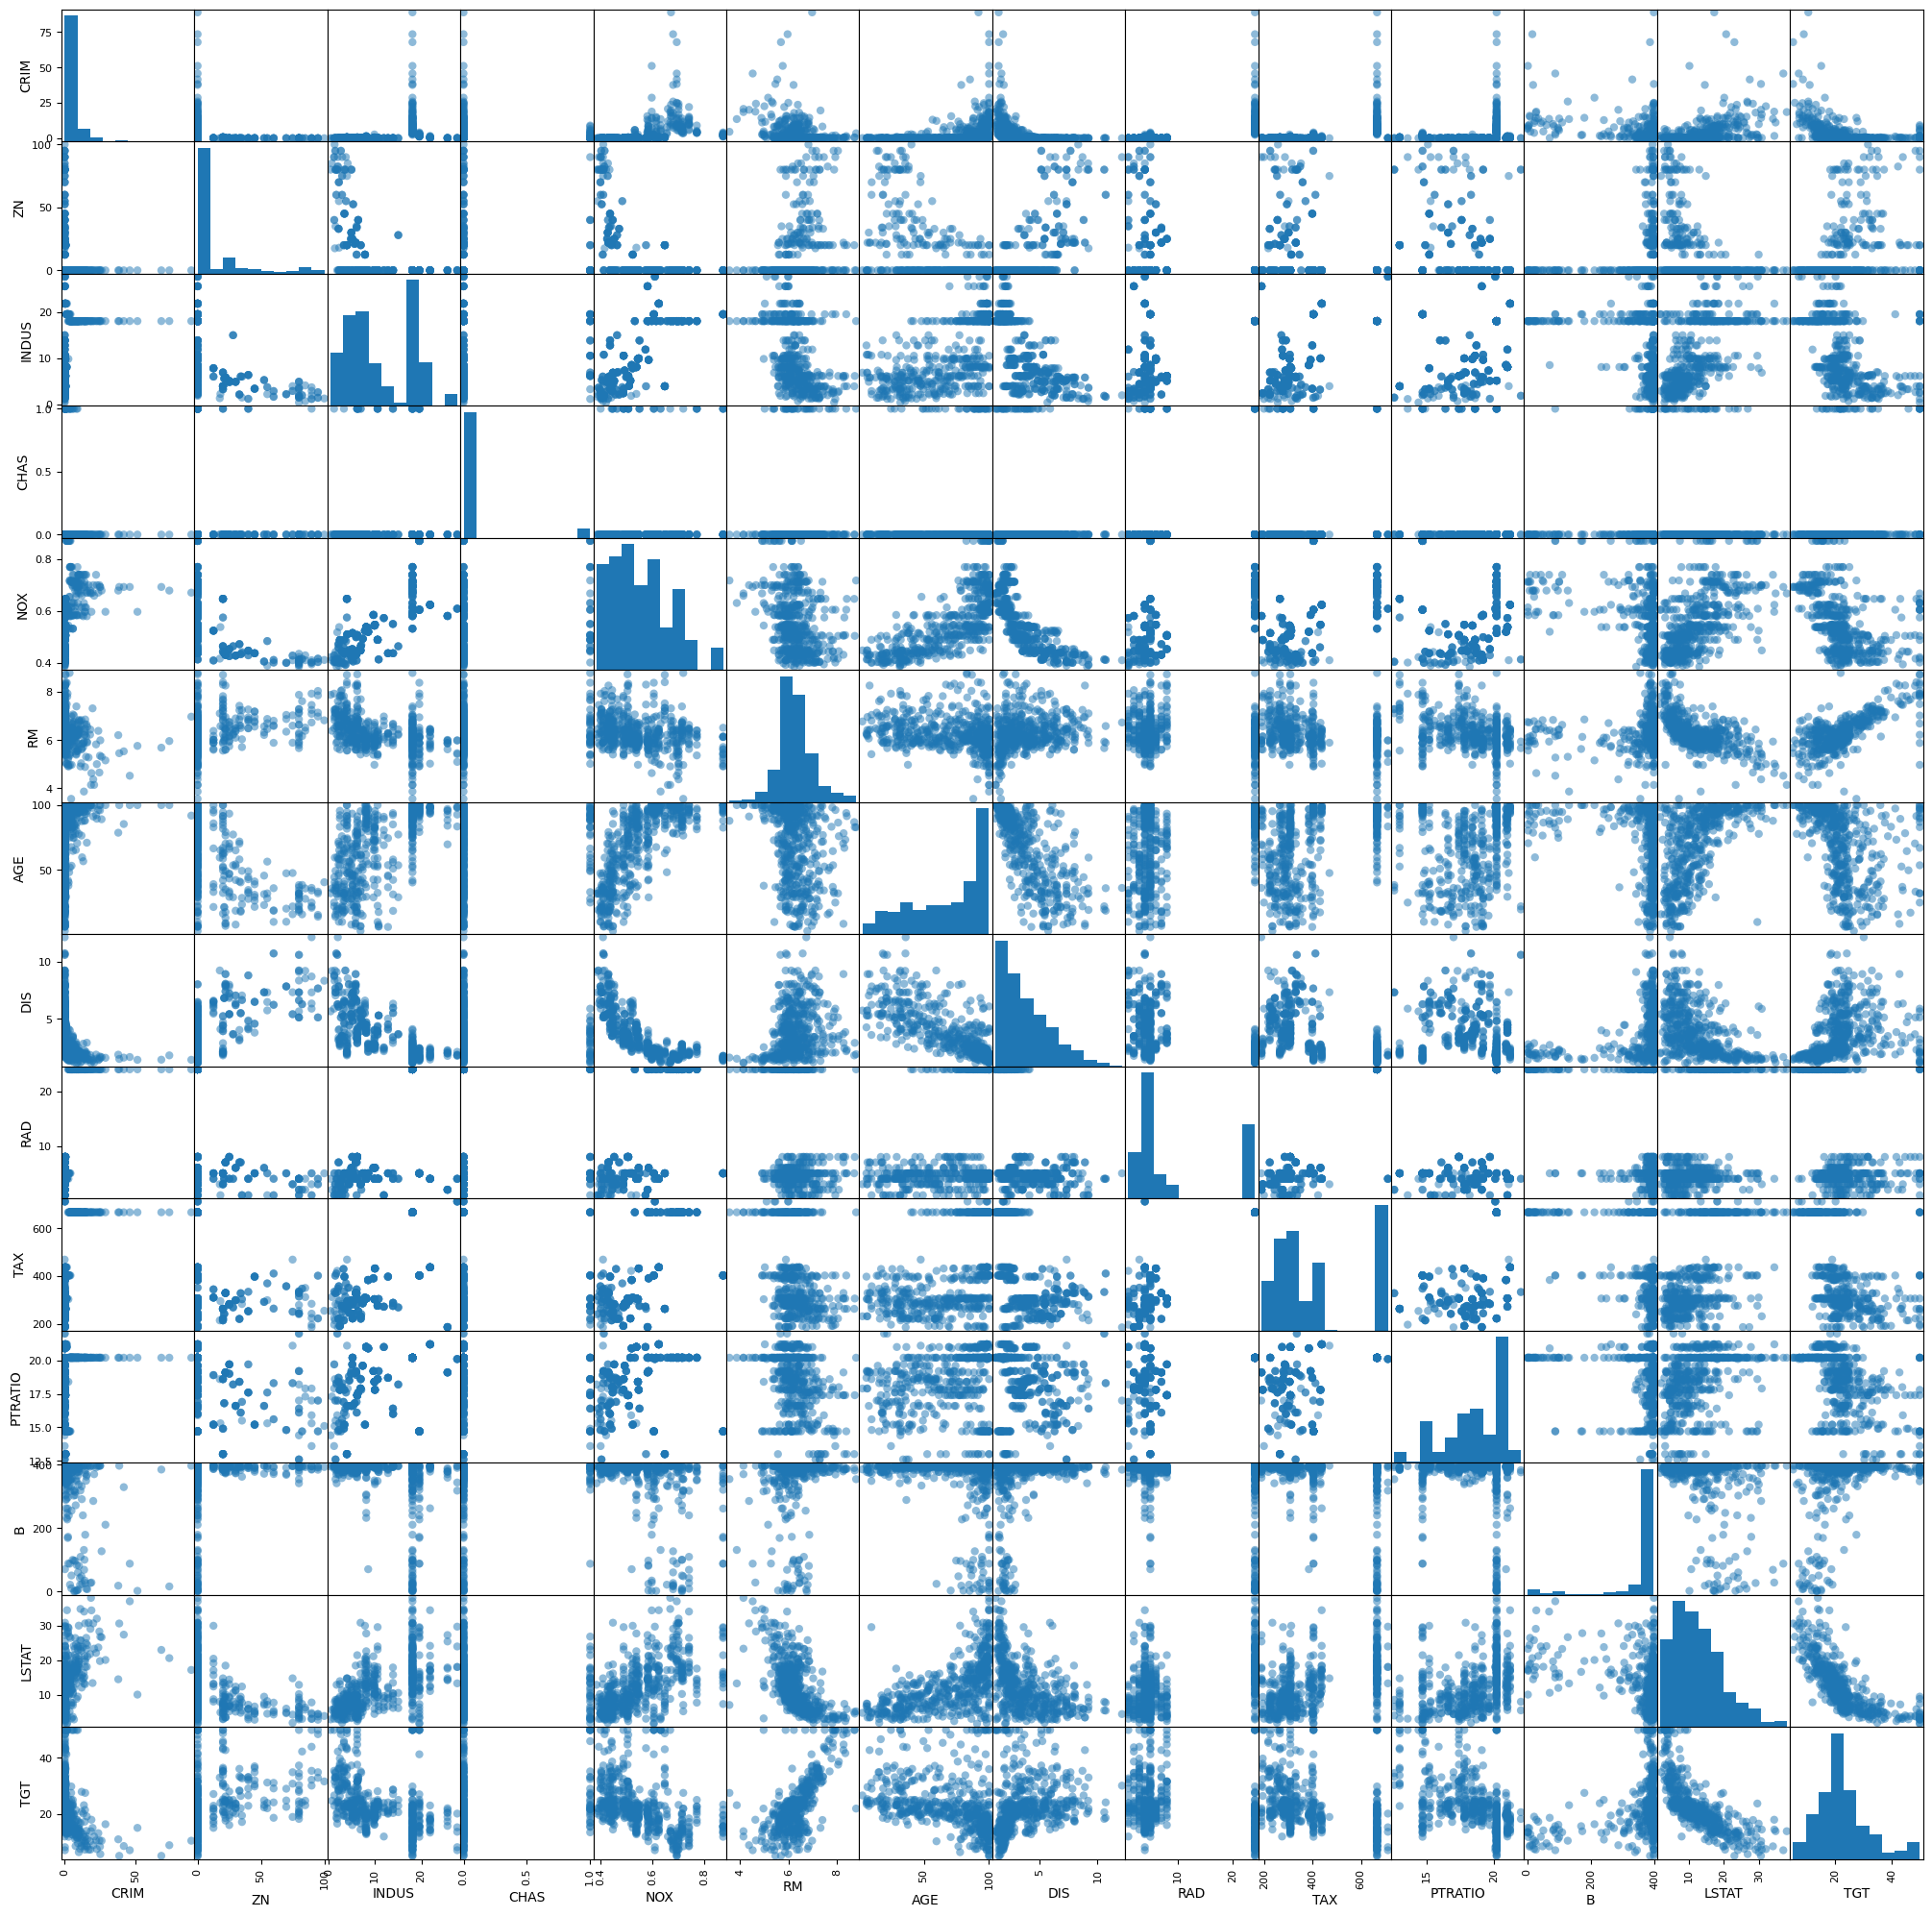

In [24]:
pd.plotting.scatter_matrix(boston, figsize=(25,25), marker='o')

<AxesSubplot: >

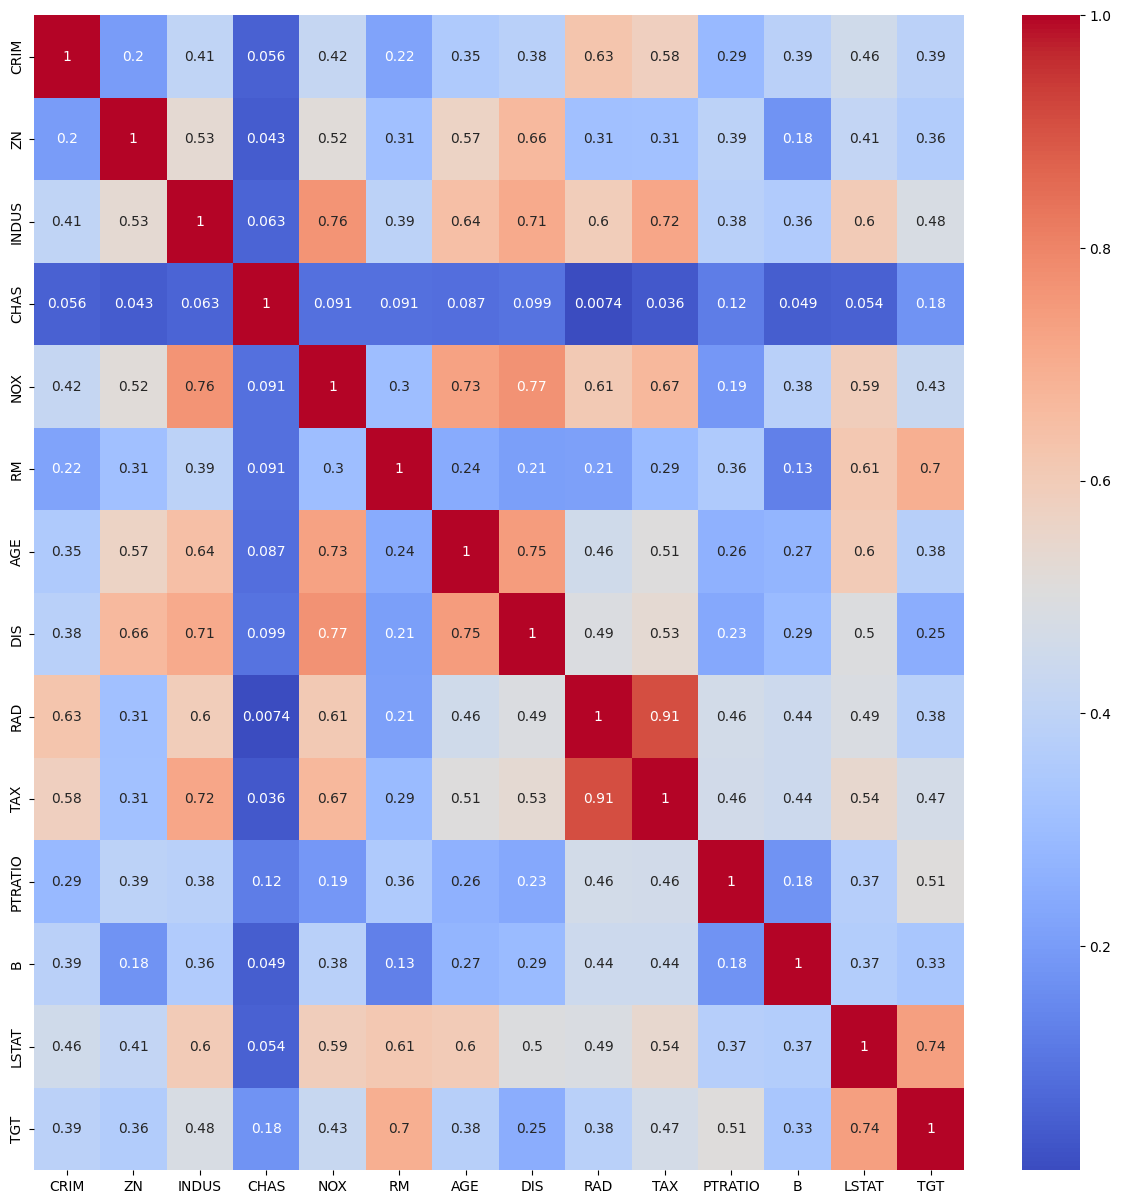

In [7]:
correlation_mat = boston.corr().abs()

plt.figure(figsize=(15,15))

sns.heatmap(correlation_mat, annot=True, cmap="coolwarm")

Variablen mit einer Korrelation > 0.7

In [20]:
correlation_mat_without_diag = correlation_mat.unstack()[correlation_mat.unstack()< 1]

correlation_mat_without_diag[correlation_mat_without_diag > 0.7].sort_values(ascending=False)

RAD    TAX      0.910228
TAX    RAD      0.910228
NOX    DIS      0.769230
DIS    NOX      0.769230
INDUS  NOX      0.763651
NOX    INDUS    0.763651
AGE    DIS      0.747881
DIS    AGE      0.747881
LSTAT  TGT      0.737663
TGT    LSTAT    0.737663
NOX    AGE      0.731470
AGE    NOX      0.731470
INDUS  TAX      0.720760
TAX    INDUS    0.720760
INDUS  DIS      0.708027
DIS    INDUS    0.708027
dtype: float64

In [22]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

#### Welche der Variablen sind kategorisch? 

Es gibt keine kategorischen Variablen, da alle Variablen im Datensatz numersich sind.

#### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? 

Zur vorhersage des Hauspreises (TGT) sind die Variablen RM und LSTAT geignet, da sie mit TGT korrelieren.

#### Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)

RM und LSTAT weisen eine Korrelation auf. RM könnte weggelassen werden, da LSTAT eine größere Korrelation mit TGT aufweist.

C)

{"Software versions":[{"module":"Python","version":"3.9.13 64bit [Clang 12.0.0 ]"},{"module":"IPython","version":"8.5.0"},{"module":"OS","version":"macOS 10.16 x86_64 i386 64bit"}]}

{"Software versions":[{"module":"Python","version":"3.9.13 64bit [Clang 12.0.0 ]"},{"module":"IPython","version":"8.5.0"},{"module":"OS","version":"macOS 10.16 x86_64 i386 64bit"},{"module":"numpy","version":"1.23.3"},{"module":"pandas","version":"1.5.0"}]}

## 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

Diese Aufgabe befasst sich mit einer deutlich umfangreicheren Datenbank des *U.S. Department of Agriculture*, aufbereitet im Format JSON von A. Williams, zum Thema Nährstoffge- halt von Nahrungsmitteln. Sie enthält 6636 Einträge für Nahrungsmittel, alle in Form von JSON-Records, wie z.B.:

```
{
    "id": 21441,
    "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing,
        meat and skin with breading", "tags": ["KFC"],
    "manufacturer": "Kentucky Fried Chicken", "group": "Fast Foods",
    "portions": [ 
        {
            "amount": 1,
            "unit": "wing , with skin",
            "grams": 68.0 
        },
        ...
    ], 
    "nutrients": [
        {
            "value": 20.8,
            "units": "g", 
            "description": "Protein",
            "group": "Composition" 
        },
        ... 
    ]
}
```

Ziel der Analyse in dieser Übung ist es, eine explorative Analyse des Gehalts des Spurenelementes Zink in den verschiedenen Nahrungsmitteln zu durchzuführen. Notwendig dafür sind etwas aufwändigere, aber für die Datenanlyse typische Manipulationen mit Pandas sowie der
Einsatz zusätzlicher Python-Standardbibliotheken zum Download und der Verarbeitung von Zip- und JSON-Dateien.

Aufgaben:


a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein. Die bisher verwendete Pandas-Methode `read_csv()` funktioniert für JSON-Files leider nicht. Das heruntergeladene File wird stattdessen mithilfe des Py- thonmoduls `zipfile` entpackt und dem Python-Befehl `open()` eingelesen. Die Umwandlung des JSON-Formates in ein geeignetes Python-Format erfolgt mit einem weiteren Modul der Python-Standardlibrary, `json`, hier mithilfe der Funktion `json.load()`. Lesen Sie dazu die zugehörigen, auf dem Web bzw. Stackoverflow verfügbaren Anleitungen.

b) Die Datenbank steht nun in Form einer Liste aus 6636 Python-Dictionaries zu Verfügung. Jedes Dictionary enthält Angaben zu einem Nahrungsmittel. Greifen Sie sich ein beliebiges Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode `dict.keys()` anzeigen. Einer der Einträge enthält die enthaltenen Nährstoffe (`nutrients`), ebenfalls als Dictionary. Lassen Sie sich wiederum einen beliebigen Eintrag der Nährstoffliste anzeigen. Es sollte auffallen, dass manche Feldnamen doppelt vorkommen.

Teile dieser hierarchischen Struktur sollen nun in eine einheitliche Tabelle umgewandelt werden, um eine explorative Analyse durchführen zu können.

Vorgehensweise:

* Kopieren Sie zunächst die Felder `description`,`group`,`id`,`manufacturer` in einen eigenen DataFrame `info`, sowie alle Nährstofflisten in ein Array von DataFrames, wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene Spalte anhängen.
* Dieses Array wird mithilfe der Funktion `pandas.concat()` zu einem großen DataFrame nutrients (389355 Einträge) vereinigt.
* Entfernen Sie alle Duplikate aus diesem DataFrame.
* Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide enthalten Felder mit dem Namen `description` und `group` (s.o.). Benennen Sie diese daher mithilfe von DataFrame.rename() in eindeutige Namen um.
* Vereinigen Sie beide DataFrames mit `pandas.merge(nutrients, info, on=’id’, how=’outer’)` anhand der Nahrungsmittel-ID.

Überprüfen Sie das Ergebnis jeder Manipulation mit `DataFrame.head()``.

c) Nun sind die Daten bereit für die Untersuchung auf das Spurenelement Zink (Feldname: `Zinc, Zn`). Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierung in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält. Daraus wählen Sie wiederum die Spalte mit dem Zinkgehalt in mg (`value`) aus und stellen dafür ein Histogramm und eine Liste deskriptiver Statistiken dar. Finden Sie in Ihrer Tabelle Edamer (`Cheese, edam`). Hat Edamer einen überdurchschnittlichen Zinkgehalt? Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt? Welches Nahrungsmittel hat den maximalen Zinkgehalt?

a)

In [3]:
import json

with open("foods-2011-10-03.json") as json_file:
    food_db = json.load(json_file)

b)

In [4]:
food_db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [5]:
food_db[0]["nutrients"]

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [6]:
info_df = pd.DataFrame({
    "id": [ datum["id"] for datum in food_db],
    "description": [ datum["description"] for datum in food_db],
    "group": [ datum["group"] for datum in food_db],
    "manufacturer": [ datum["manufacturer"] for datum in food_db],
})

In [7]:
nutrients_array = [ pd.DataFrame(datum["nutrients"]).assign(id=datum["id"]) for datum in food_db ]

nutrients_df = pd.concat(nutrients_array)

In [8]:
nutrients_df

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [9]:
nutrients_df = nutrients_df.drop_duplicates()

In [10]:
nutrients_df.duplicated().any()

False

In [11]:
nutrients_df

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [12]:
nutrients_df = nutrients_df.rename(columns={"description":"nutrient_description", "group":"nutrient_group"})
nutrients_df.head()

,value,units,nutrient_description,nutrient_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [14]:
food_df = pd.merge(nutrients_df, info_df, on='id', how='outer')
food_df

,value,units,nutrient_description,nutrient_group,id,description,group,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


c)

In [97]:
food_df["nutrient_description"].unique

<bound method Series.unique of 0                                    Protein
1                          Total lipid (fat)
2                Carbohydrate, by difference
3                                        Ash
4                                     Energy
                         ...                
375171                   Vitamin B-12, added
375172                           Cholesterol
375173          Fatty acids, total saturated
375174    Fatty acids, total monounsaturated
375175    Fatty acids, total polyunsaturated
Name: nutrient_description, Length: 375176, dtype: object>

In [110]:
zinc_df = food_df[food_df["nutrient_description"] == "Zinc, Zn"]
zinc_df.head(10)

,value,units,nutrient_description,nutrient_group,id,description,group,manufacturer
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",Dairy and Egg Products,
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",Dairy and Egg Products,
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
364,3.13,mg,"Zinc, Zn",Elements,1029,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,
440,2.58,mg,"Zinc, Zn",Elements,1038,"Cheese, romano",Dairy and Egg Products,
507,2.08,mg,"Zinc, Zn",Elements,1039,"Cheese, roquefort",Dairy and Egg Products,
565,2.59,mg,"Zinc, Zn",Elements,1048,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,
637,0.51,mg,"Zinc, Zn",Elements,1049,"Cream, fluid, half and half",Dairy and Egg Products,


In [104]:
zinc_df["value"].describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

array([[<AxesSubplot: title={'center': 'value'}>]], dtype=object)

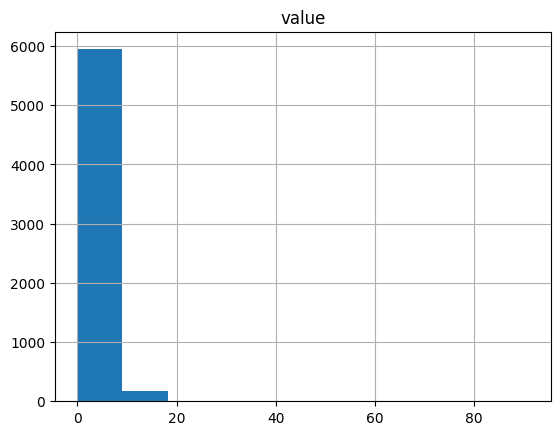

In [112]:
zinc_df.hist(column="value")

In [111]:
zinc_df[zinc_df["description"] == "Cheese, edam"]

,value,units,nutrient_description,nutrient_group,id,description,group,manufacturer
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,


Edam Käse hat mit 3,75mg mehr Zinc als 75% der Lebensmittel in der Datenbank.

In [115]:
zinc_df.sort_values(by="value", ascending=False)

,value,units,nutrient_description,nutrient_group,id,description,group,manufacturer
333726,90.95,mg,"Zinc, Zn",Elements,15170,"Mollusks, oyster, eastern, canned",Finfish and Shellfish Products,
333586,87.13,mg,"Zinc, Zn",Elements,15168,"Mollusks, oyster, eastern, cooked, breaded and...",Finfish and Shellfish Products,
333650,78.60,mg,"Zinc, Zn",Elements,15169,"Mollusks, oyster, eastern, wild, cooked, moist...",Finfish and Shellfish Products,
57779,64.33,mg,"Zinc, Zn",Elements,8504,"Cereals ready-to-eat, Ralston Enriched Bran fl...",Breakfast Cereals,Ralston Foods
338026,61.04,mg,"Zinc, Zn",Elements,15244,"Mollusks, oyster, eastern, wild, cooked, dry heat",Finfish and Shellfish Products,
...,...,...,...,...,...,...,...,...
17894,0.00,mg,"Zinc, Zn",Elements,4548,"Shortening cake mix, soybean (hydrogenated) an...",Fats and Oils,
279187,0.00,mg,"Zinc, Zn",Elements,43372,"Apple cider-flavored drink, powder, added vita...",Beverages,
17768,0.00,mg,"Zinc, Zn",Elements,4529,"Oil, almond",Fats and Oils,
17697,0.00,mg,"Zinc, Zn",Elements,4528,"Oil, walnut",Fats and Oils,


Mollusks, oyster, eastern, canned hat mit 90,95 mg am meisten Zink.

## 3. Implementierung der Hauptkomponentenanalyse

Wir beginnen zunächst mit einem schon bekannten Datensatz *Boston Housing*. Zur praktischen Berechnung der Hauptkomponentenanalyse gehen Sie folgt vor:

1. Gegeben eine Menge von $n$ $d$-dimensionalen Datenpunkten $\mathbf{x}_i$, berechnen Sie zuerst deren Mittelwert $\boldsymbol{\mu}_x = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ für jedes einzelne Merkmal und ziehen ihn von allen Datenpunkten ab (Zentrierung).
2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.
3. Kopieren Sie alle $\mathbf{x}_i$ als Reihen in eine $n \times d$-Matrix $X$, die sog. Daten- oder Designmatrix.
4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von $X$ (z.B. mit `numpy.linalg.svd()`): $$ X = UDV^\top $$
Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit `numpy.linalg.eig()`), diese Methode ist aber meist aufwändiger und numerisch weniger stabil.
5. Die ersten $r$ Basisvektoren $\mathbf{q}_i$  (d.h die ersten $r$ Hauptkomponenten) sind die ersten $r$ Spalten der orthogonalen $d \times d$-Matrix $V$.
6. Die Projektionen $a_i$ der Daten $\mathbf{x}_i$ auf die ersten $r$ Basisvektoren $\mathbf{q}_i$ (d.h die neuen Variablenwerte im neuen Koordinatensystem) sind die die ersten $r$ Spalten der $n \times d$-Matrix $UD$.
7. Die Standardabweichungen entlang der Hauptkomponenten $\mathbf{q}_i$ sind die Diagonalelemente der Diagonalmatrix $D$ geteilt durch $\sqrt{n - 1}$.

Aufgaben:

a) Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.

b) Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz *Boston Housing*. Lassen Sie dabei die Variable `TGT` weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von $D$ müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten $n$ Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

d) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

e. Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

a)

In [5]:
def pca(n_dim_df):

    # 1. Center
    centered_df = n_dim_df - n_dim_df.mean()

    # 2. Normalize
    normalized_df = centered_df / centered_df.std()
    #print(normalized_df.var())

    # 3. Create n x m Designmatrix
    design_mat = normalized_df.to_numpy()
    
    # 4. Singulärvektorzerlegung
    u,s,v = np.linalg.svd(design_mat, full_matrices=False)
    print(u.shape, s.shape, v.shape)

    # 5. Projections a_i
    projections = np.dot(u, np.diag(s))

    # 6. Std q_i
    std = u.diagonal() / np.sqrt(len(u.diagonal() - 1))

    return u, v, s, projections, std, design_mat, np.dot(u, np.dot(np.diag(s), v))

b)

In [6]:
boston_df = df = boston.loc[ : , boston.columns != 'TGT']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
u, q_i, eigenwerte, a_i, std_i, design_mat_orig, design_mat_svd = pca(boston_df)
print(q_i.shape, a_i.shape, std_i.shape)

(506, 13) (13,) (13, 13)
(13, 13) (506, 13) (13,)


In [8]:
eigenwerte

array([55.62426321, 26.90360453, 25.05037764, 20.81046443, 20.53246327,
       18.22060986, 16.44247012, 14.14316598, 11.82608902, 10.54609414,
        9.69212337,  9.24651299,  5.66323022])

In [9]:
eigenwerte

array([55.62426321, 26.90360453, 25.05037764, 20.81046443, 20.53246327,
       18.22060986, 16.44247012, 14.14316598, 11.82608902, 10.54609414,
        9.69212337,  9.24651299,  5.66323022])

In [10]:
#           Singulärwert
eigenwerte = eigenwerte**2 / (len(eigenwerte) - 1)

pca_df = pd.DataFrame({
    "eigenwerte": eigenwerte,
    "gesamt_varianz": np.sum(eigenwerte),
    "erklärte_varianz": eigenwerte / np.sum(eigenwerte),
    "kumulierte_erklärte_varianz": np.cumsum(eigenwerte / np.sum(eigenwerte))
})

pca_df

,eigenwerte,gesamt_varianz,erklärte_varianz,kumulierte_erklärte_varianz
0,257.838221,547.083333,0.471296,0.471296
1,60.316995,547.083333,0.110252,0.581548
2,52.293452,547.083333,0.095586,0.677134
3,36.089619,547.083333,0.065967,0.743101
4,35.131837,547.083333,0.064217,0.807318
5,27.665885,547.083333,0.050570,0.857888
6,22.529569,547.083333,0.041181,0.899069
7,16.669095,547.083333,0.030469,0.929538
8,11.654698,547.083333,0.021303,0.950841
9,9.268342,547.083333,0.016941,0.967783


<AxesSubplot: xlabel='Anzahl Hauptkomponenten', ylabel='Kumulierte erklärte Varianz'>

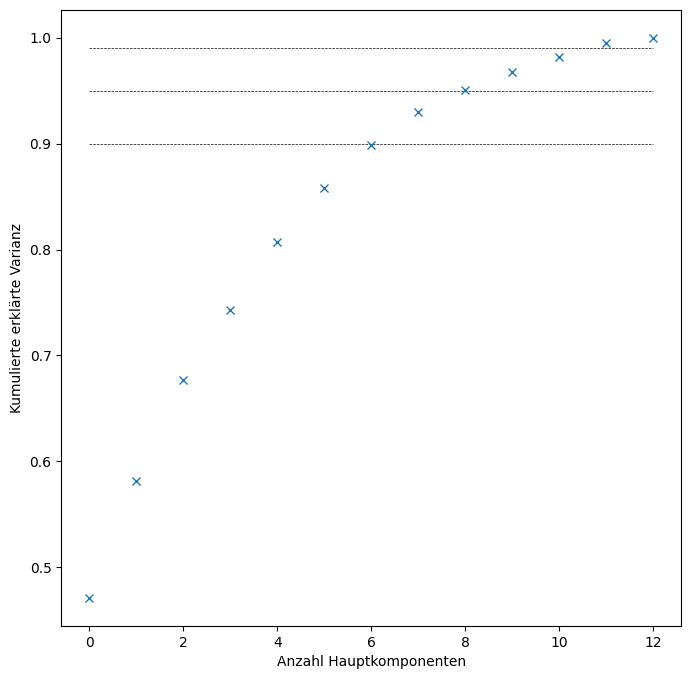

In [11]:
from cProfile import label
from turtle import color


plt.figure(figsize=(8,8))
plt.xlabel("Anzahl Hauptkomponenten")
plt.ylabel("Kumulierte erklärte Varianz")

plt.plot([0,2,4,6,8,10,12],[0.9,0.9,0.9,0.9,0.9,0.9,0.9], color="black", linestyle = "dashed", linewidth=0.5)
plt.plot([0,2,4,6,8,10,12],[0.95,0.95,0.95,0.95,0.95,0.95,0.95], color="black", linestyle = "dashed", linewidth=0.5)
plt.plot([0,2,4,6,8,10,12],[0.99,0.99,0.99,0.99,0.99,0.99,0.99], color="black", linestyle = "dashed", linewidth=0.5)

pca_df["kumulierte_erklärte_varianz"].plot(style="x")



10  %   Fehler -> 6 Hauptkomponenten
5   %   Fehler -> 8 Hauptkomponenten
1   %   Fehler -> 12 Hauptkomponenten

c)

In [12]:
pd.DataFrame(a_i).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,-3.632445e-16,2.825338e-16,-1.697129e-16,1.790219e-16,-2.195850e-16,3.225606e-16,-6.742616e-17,-6.253066e-17,-1.729818e-16,7.118221e-17,-1.727538e-17,1.703263e-17
1,-3.632445e-16,1.000000e+00,-2.756014e-16,1.517474e-16,-2.391694e-17,1.041825e-16,-1.307586e-16,5.324956e-18,6.120518e-16,-1.310850e-16,-1.511504e-17,-2.038451e-16,1.253895e-16
2,2.825338e-16,-2.756014e-16,1.000000e+00,1.515267e-16,-4.178883e-16,3.171835e-16,4.545178e-16,-1.708618e-16,9.069225e-17,-8.488983e-17,1.432412e-16,-1.195883e-16,6.258238e-17
3,-1.697129e-16,1.517474e-16,1.515267e-16,1.000000e+00,3.655792e-16,1.935749e-16,-3.467263e-16,-1.046047e-16,-7.680234e-17,1.272257e-16,-2.203134e-16,-1.579445e-17,-3.368269e-16
4,1.790219e-16,-2.391694e-17,-4.178883e-16,3.655792e-16,1.000000e+00,-9.258931e-17,1.512725e-17,-2.131412e-17,3.154838e-17,-2.009850e-16,-1.287336e-16,-7.075816e-17,2.359211e-16
5,-2.195850e-16,1.041825e-16,3.171835e-16,1.935749e-16,-9.258931e-17,1.000000e+00,-4.863843e-17,7.358218e-16,8.655964e-17,1.242207e-16,-2.498996e-17,4.007395e-16,6.440436e-17
6,3.225606e-16,-1.307586e-16,4.545178e-16,-3.467263e-16,1.512725e-17,-4.863843e-17,1.000000e+00,4.027746e-16,3.449997e-16,1.322122e-16,7.502215e-17,2.958382e-16,-1.809241e-16
7,-6.742616e-17,5.324956e-18,-1.708618e-16,-1.046047e-16,-2.131412e-17,7.358218e-16,4.027746e-16,1.000000e+00,2.126577e-16,1.667324e-16,-6.196683e-16,4.098870e-16,-1.658682e-16
8,-6.253066e-17,6.120518e-16,9.069225e-17,-7.680234e-17,3.154838e-17,8.655964e-17,3.449997e-16,2.126577e-16,1.000000e+00,3.542913e-16,9.395543e-17,3.523064e-16,4.160299e-16
9,-1.729818e-16,-1.310850e-16,-8.488983e-17,1.272257e-16,-2.009850e-16,1.242207e-16,1.322122e-16,1.667324e-16,3.542913e-16,1.000000e+00,-2.137049e-16,6.335863e-16,-6.204055e-17


<AxesSubplot: >

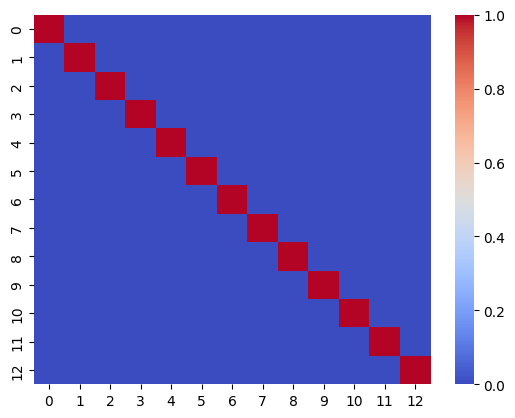

In [13]:
sns.heatmap(np.abs(pd.DataFrame(a_i).corr()), cmap="coolwarm")

-> Die neuen Variablen sind untereinander unkorreliert.

d)

In [14]:
design_mat_orig.shape

(506, 13)

In [15]:
q_i[:3].T.shape

(13, 3)

In [16]:
np.dot(design_mat_orig, q_i[:3].T).shape

(506, 3)

In [17]:
a_i

array([[-2.09622303,  0.77234843,  0.34260368, ..., -0.03296774,
        -0.01942101,  0.36561351],
       [-1.45581099,  0.59139995, -0.69451201, ..., -0.64017631,
         0.12567304, -0.07064958],
       [-2.07254655,  0.59904658,  0.16695638, ..., -0.48707471,
        -0.13319472, -0.01400794],
       ...,
       [-0.31205166,  1.15410433, -0.40819364, ...,  0.115542  ,
        -0.28168531,  0.06241182],
       [-0.27025162,  1.04033206, -0.58487527, ...,  0.08692638,
        -0.30140255,  0.05431616],
       [-0.12567884,  0.76122473, -1.29360184, ...,  0.18413878,
        -0.2325031 ,  0.01968924]])

<AxesSubplot: >

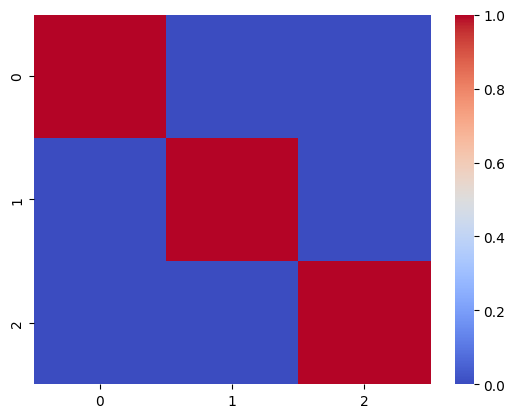

In [18]:
sns.heatmap(pd.DataFrame(np.dot(design_mat_orig, q_i[:3].T)).corr(), cmap="coolwarm")

<AxesSubplot: >

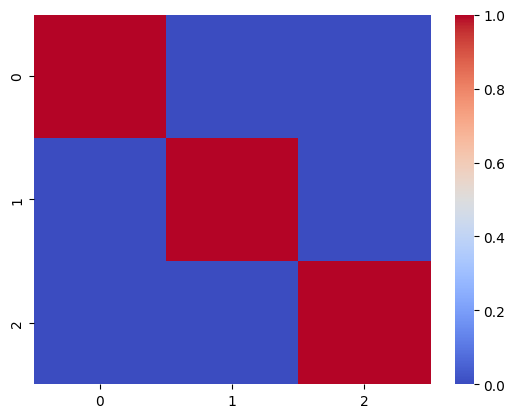

In [19]:
sns.heatmap(pd.DataFrame(a_i[:,:3]).corr(), cmap="coolwarm")


Die projezierten Variablen sind ebenfall unkorreliert ?

e)

In [20]:
components_df = pd.DataFrame(a_i[:, :2])
components_df

,0,1
0,-2.096223,0.772348
1,-1.455811,0.591400
2,-2.072547,0.599047
3,-2.608922,-0.006864
4,-2.455755,0.097615
...,...,...
501,-0.314656,0.723568
502,-0.110404,0.758557
503,-0.312052,1.154104
504,-0.270252,1.040332


<AxesSubplot: xlabel='0', ylabel='1'>

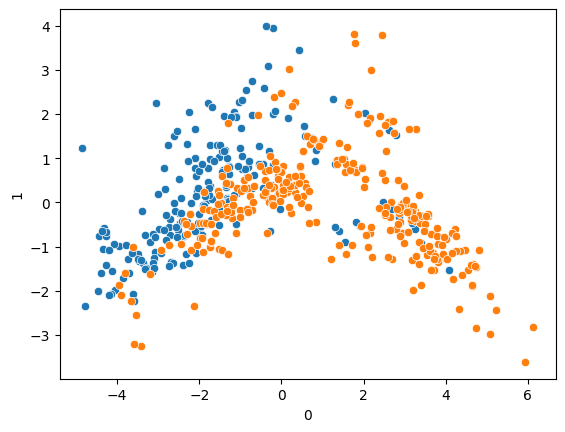

In [21]:
sns.scatterplot(data=components_df.loc[boston[boston["TGT"] > boston["TGT"].mean()].index], x=0, y=1)
sns.scatterplot(data=components_df.loc[boston[boston["TGT"] < boston["TGT"].mean()].index], x=0, y=1)

Sie eignen sich nicht?

In [22]:
from sklearn.decomposition import PCA

In [29]:
principal=PCA(n_components=2, whiten=True)
principal.fit(design_mat_orig)

x=principal.transform(design_mat_orig)

In [30]:
x


array([[-0.84687421,  0.64513178],
       [-0.58814771,  0.49398809],
       [-0.83730891,  0.50037522],
       ...,
       [-0.12606889,  0.96400723],
       [-0.10918167,  0.86897484],
       [-0.05077426,  0.6358404 ]])

In [31]:
df_sk=pd.DataFrame(x)


<AxesSubplot: xlabel='0', ylabel='1'>

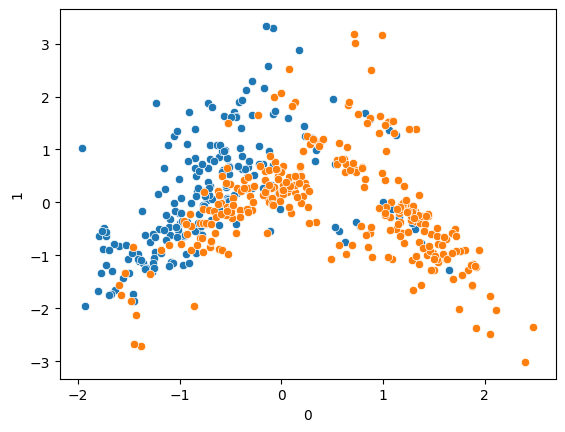

In [32]:
sns.scatterplot(data=df_sk.loc[boston[boston["TGT"] > boston["TGT"].mean()].index], x=0, y=1)
sns.scatterplot(data=df_sk.loc[boston[boston["TGT"] < boston["TGT"].mean()].index], x=0, y=1)
